<a href="https://colab.research.google.com/github/BabMostafa/classification/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install rdkit scikit-learn torch torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from rdkit.Chem import AllChem

[19:27:56] WARNING: not removing hydrogen atom without neighbors
[19:27:56] WARNING: not removing hydrogen atom without neighbors
[19:27:57] WARNING: not removing hydrogen atom without neighbors
[19:27:57] WARNING: not removing hydrogen atom without neighbors
[19:27:57] WARNING: not removing hydrogen atom without neighbors
[19:27:57] WARNING: not removing hydrogen atom without neighbors
[19:27:57] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:58] WARNING: not removing hydrogen atom without neighbors
[19:27:59] WARNING: not removing hydrogen atom without neighbors
[19:27:59] WARNING: not r

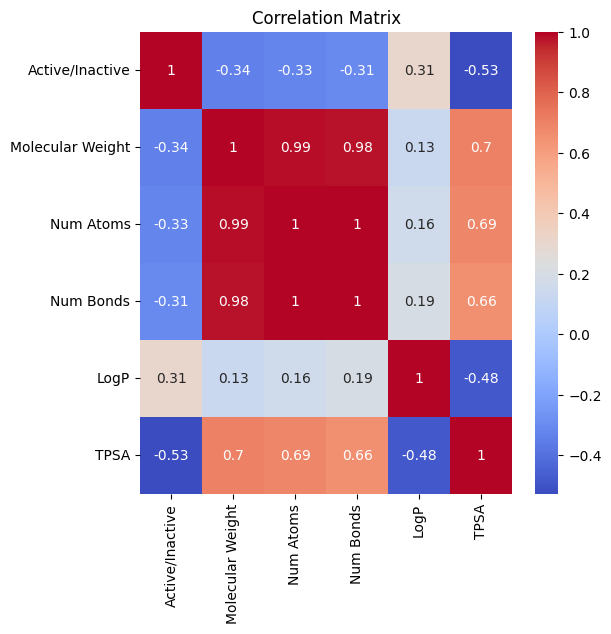

In [ ]:
# Load our dataset
data = pd.read_csv('BBBP-processed2.csv')

# Generate molecular descriptors using the rdkit package
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        num_atoms = mol.GetNumAtoms()
        num_bonds = mol.GetNumBonds()
        log_p = Descriptors.MolLogP(mol)
        TPSA = rdMolDescriptors.CalcTPSA(mol)
        return pd.Series([mol_weight, num_atoms, num_bonds, log_p, TPSA])
    else:
        return pd.Series([None, None, None, None, None])

# Add generated molecular descriptors to our dataframe
data[['Molecular Weight', 'Num Atoms', 'Num Bonds', 'LogP', 'TPSA']] = data['SMILES'].apply(calculate_descriptors)

# Correlation analysis
plt.figure(figsize=(6, 6))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Training Classification Models Using the Most Common Models

In [ ]:
# Morgan Fingerprints
morgan_gen = AllChem.GetMorganGenerator(radius=2, fpSize=2048)

def calculate_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = morgan_gen.GetFingerprint(mol)
        return np.array(fp)
    else:
        return np.zeros(2048)

# Generate molecular fingerprints
X = np.array([calculate_fingerprints(smiles) for smiles in data['SMILES']])
y = data['Active/Inactive']

# Function for model evaluation
def evaluate_model(model, model_name, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=kf)

    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    # Plotting
    sns.histplot(y_pred, color='b', alpha=0.6, label='Predicted')
    sns.histplot(y, color='r', alpha=0.4, label='True')
    plt.title(f'{model_name} \n Accuracy: {acc:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}')
    plt.legend()
    plt.show()

    return acc, f1, auc

[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:16] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not removing hydrogen atom without neighbors
[19:28:17] WARNING: not r

Using RDKit Morgan Molecular Fingerprints as Descriptors

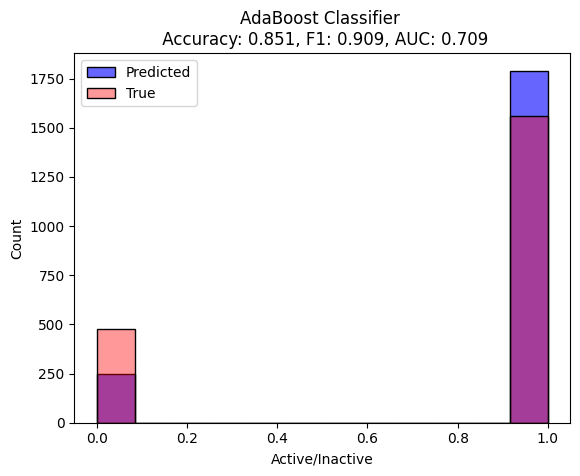

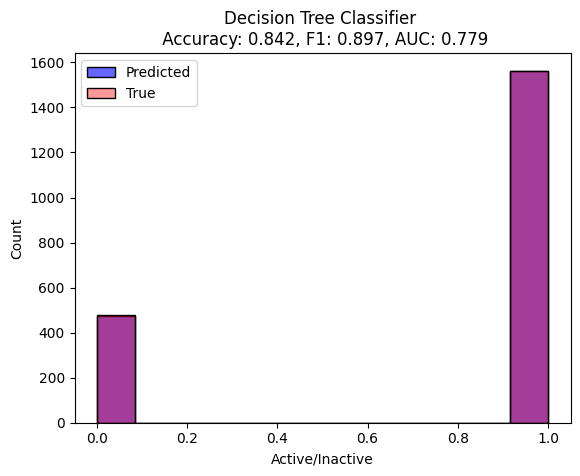

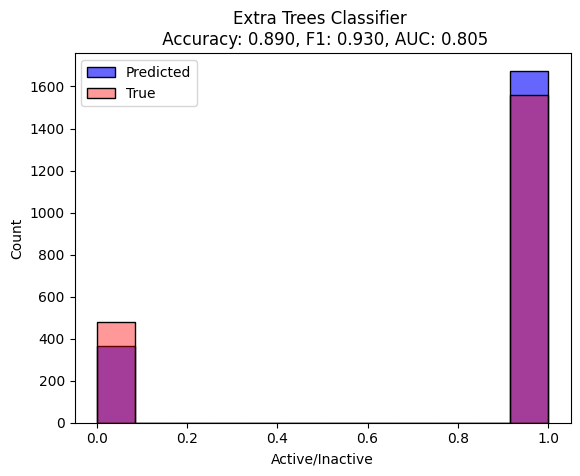

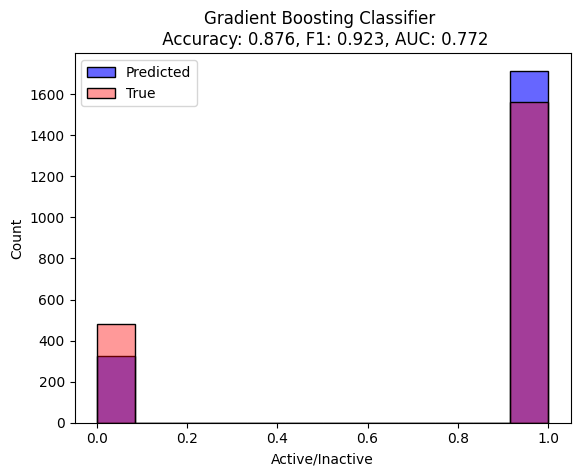

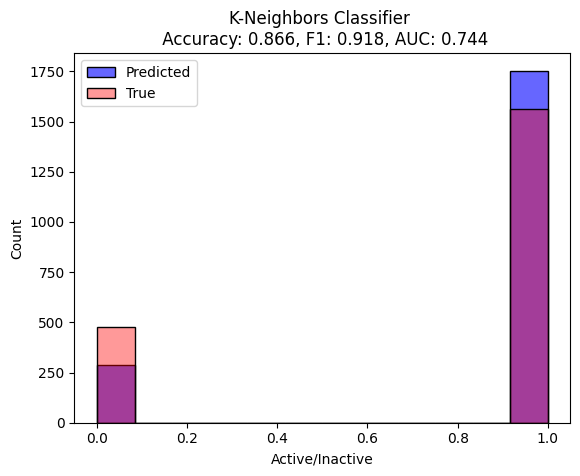

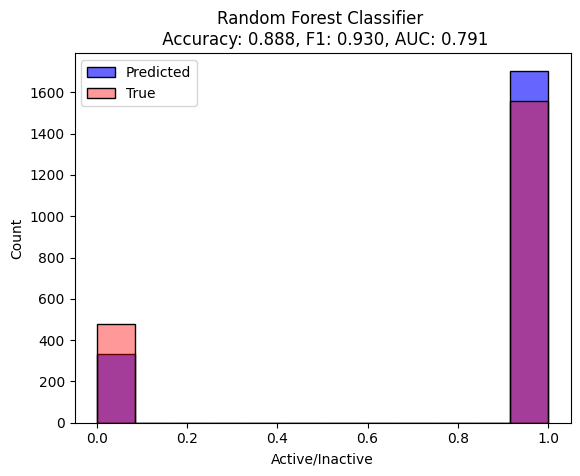

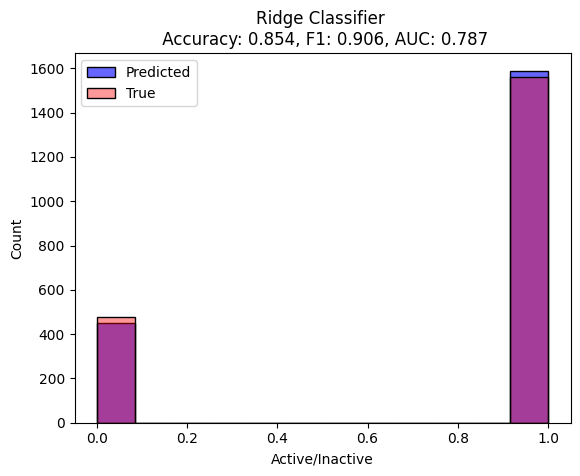

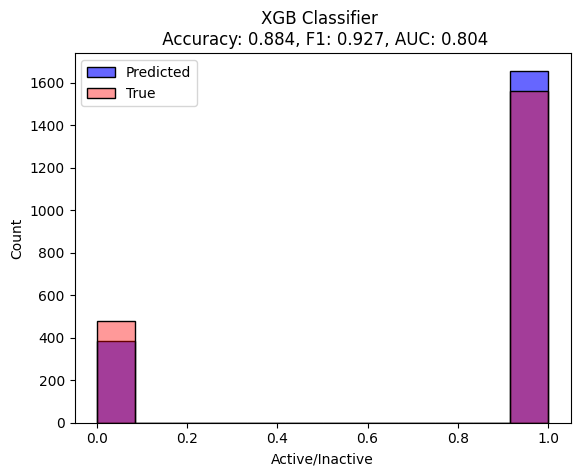

(0.8842569887199607, 0.9266169154228856, 0.8042864407686955)

In [ ]:
# AdaBoostClassifier (with SAMME algorithm)
ada_model = AdaBoostClassifier(algorithm='SAMME')
evaluate_model(ada_model, 'AdaBoost Classifier', X=X, y=y)

# DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, 'Decision Tree Classifier', X=X, y=y)

# ExtraTreesClassifier
et_model = ExtraTreesClassifier()
evaluate_model(et_model, 'Extra Trees Classifier', X=X, y=y)

# GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, 'Gradient Boosting Classifier', X=X, y=y)

# KNeighborsClassifier
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, 'K-Neighbors Classifier', X=X, y=y)

# RandomForestClassifier
rf_model = RandomForestClassifier()
evaluate_model(rf_model, 'Random Forest Classifier', X=X, y=y)

# RidgeClassifier
ridge_model = RidgeClassifier()
evaluate_model(ridge_model, 'Ridge Classifier', X=X, y=y)

# XGBClassifier
xgb_model = XGBClassifier()
evaluate_model(xgb_model, 'XGB Classifier', X=X, y=y)

Using RDKit Molecular Properties as Descriptors

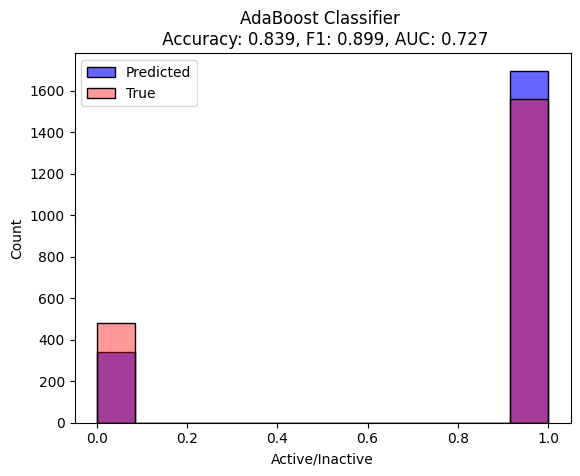

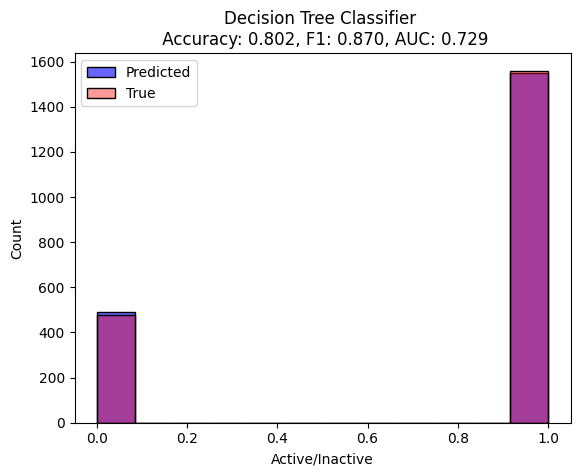

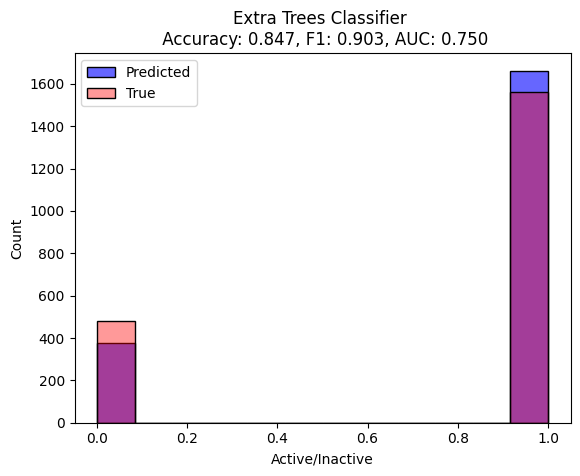

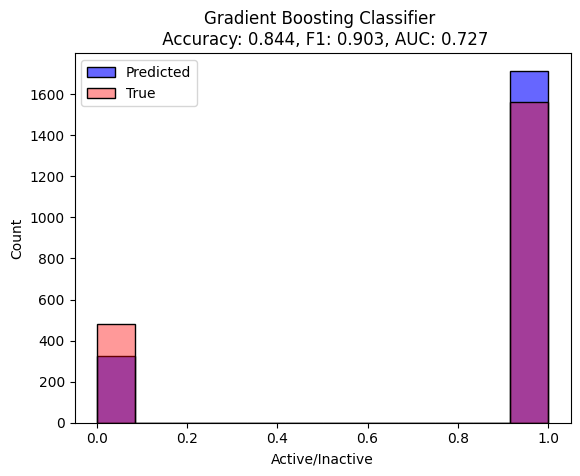

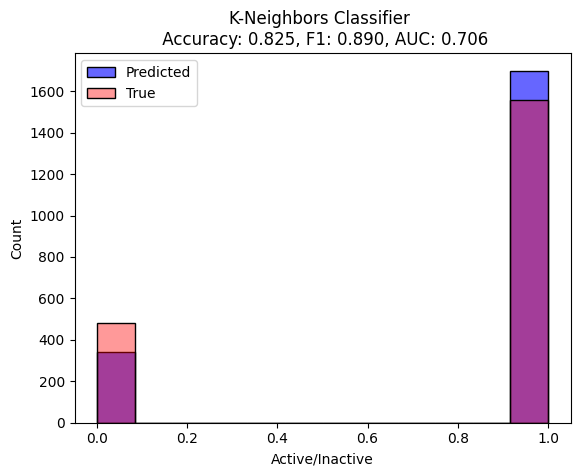

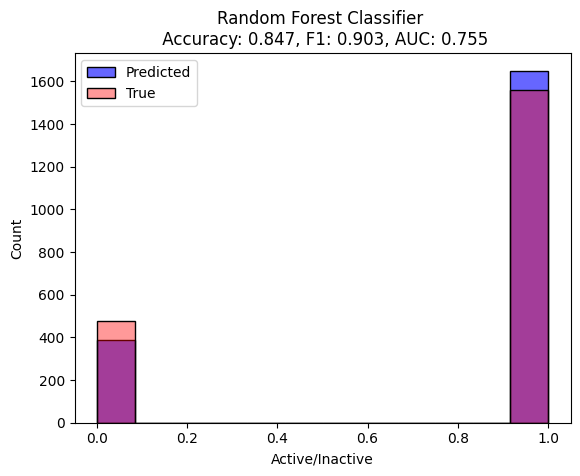

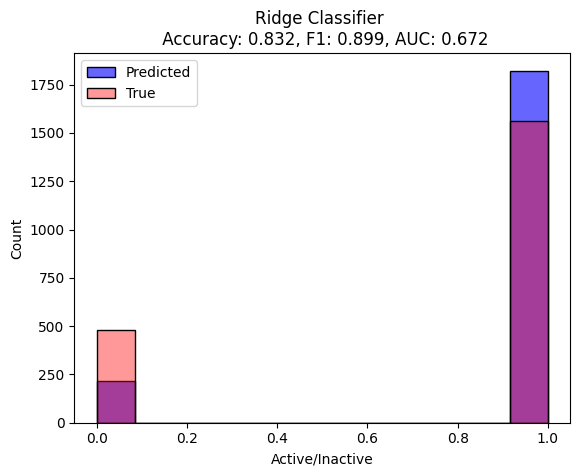

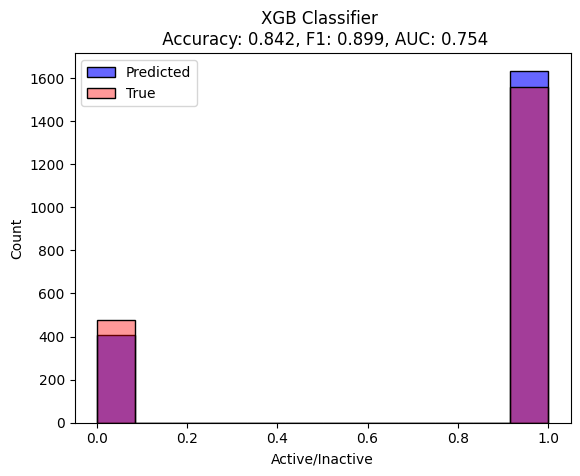

(0.8420794507111329, 0.8991859737006888, 0.7535758257052619)

In [ ]:
# Select our molecular properties as features
X_properties = data[['Molecular Weight', 'Num Atoms', 'Num Bonds', 'LogP', 'TPSA']].values

# AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME')
evaluate_model(ada_model, 'AdaBoost Classifier', X=X_properties, y=y)

# DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, 'Decision Tree Classifier', X=X_properties, y=y)

# ExtraTreesClassifier
et_model = ExtraTreesClassifier()
evaluate_model(et_model, 'Extra Trees Classifier', X=X_properties, y=y)

# GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, 'Gradient Boosting Classifier', X=X_properties, y=y)

# KNeighborsClassifier
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, 'K-Neighbors Classifier', X=X_properties, y=y)

# RandomForestClassifier
rf_model = RandomForestClassifier()
evaluate_model(rf_model, 'Random Forest Classifier', X=X_properties, y=y)

# RidgeClassifier
ridge_model = RidgeClassifier()
evaluate_model(ridge_model, 'Ridge Classifier', X=X_properties, y=y)

# XGBClassifier
xgb_model = XGBClassifier()
evaluate_model(xgb_model, 'XGB Classifier', X=X_properties, y=y)

Training A Graph Neural Network (GNN) Classification Model¶

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdmolops
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch
from torch.nn import Sequential, Linear, ReLU, Sigmoid
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv('BBBP-processed2.csv')

# Function to convert SMILES to PyTorch Geometric Data object (graph)
def mol_to_graph(smiles, target):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Convert atoms into node features
    atom_features = torch.tensor([atom.GetAtomicNum() for atom in mol.GetAtoms()], dtype=torch.float).view(-1, 1)

    # Create edge index (connectivity between atoms)
    adj_matrix = rdmolops.GetAdjacencyMatrix(mol)
    edge_index = np.array(np.nonzero(adj_matrix))  # Get non-zero indices in numpy array
    edge_index = torch.tensor(edge_index, dtype=torch.long)  # Directly convert to PyTorch tensor

    # Convert target into tensor
    target_tensor = torch.tensor([target], dtype=torch.float)

    # Create PyTorch Geometric data object
    graph_data = Data(x=atom_features, edge_index=edge_index, y=target_tensor)
    return graph_data

# Create a dataset of graphs and targets
graph_data_list = []
for smiles, activity in zip(data['SMILES'], data['Active/Inactive']):
    graph_data = mol_to_graph(smiles, activity)
    if graph_data is not None:
        graph_data_list.append(graph_data)

# Split the dataset into 5 folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define our GNN model for binary classification
class GNN(torch.nn.Module):
   def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = Sequential(Linear(hidden_channels, 64), ReLU(), Linear(64, 1), Sigmoid())

   def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = global_mean_pool(x, data.batch)
        x = self.fc(x)
        return x

# Functions for training and evaluation
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out.view(-1), data.y.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, criterion):
    model.eval()
    y_true = []
    y_pred = []
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            out = model(data)
            y_true.extend(data.y.view(-1).tolist())
            y_pred.extend(out.view(-1).tolist())
            loss = criterion(out.view(-1), data.y.view(-1))
            total_loss += loss.item()

    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_true, y_pred_binary)
    auc = roc_auc_score(y_true, y_pred)
    return total_loss / len(loader), accuracy, auc, y_true, y_pred_binary

[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:32] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not removing hydrogen atom without neighbors
[19:34:33] WARNING: not r

Fold 1
Epoch 0, Train Loss: 0.5725, Test Loss: 0.5548
Epoch 10, Train Loss: 0.5467, Test Loss: 0.5542
Epoch 20, Train Loss: 0.5472, Test Loss: 0.5548
Epoch 30, Train Loss: 0.5480, Test Loss: 0.5538
Epoch 40, Train Loss: 0.5459, Test Loss: 0.5525
Epoch 50, Train Loss: 0.5445, Test Loss: 0.5569
Epoch 60, Train Loss: 0.5474, Test Loss: 0.5525
Epoch 70, Train Loss: 0.5446, Test Loss: 0.5506
Epoch 80, Train Loss: 0.5438, Test Loss: 0.5495
Epoch 90, Train Loss: 0.5435, Test Loss: 0.5483


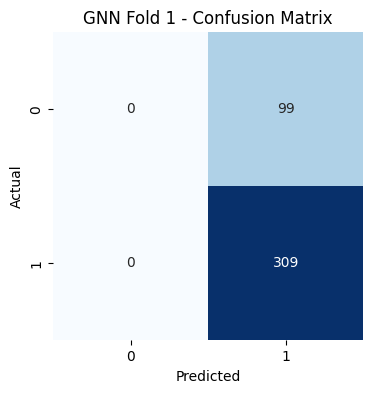

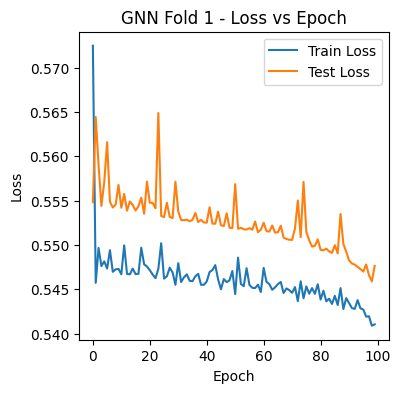

Fold 2
Epoch 0, Train Loss: 0.5667, Test Loss: 0.5315
Epoch 10, Train Loss: 0.5521, Test Loss: 0.5330
Epoch 20, Train Loss: 0.5563, Test Loss: 0.5349
Epoch 30, Train Loss: 0.5525, Test Loss: 0.5291
Epoch 40, Train Loss: 0.5525, Test Loss: 0.5337
Epoch 50, Train Loss: 0.5519, Test Loss: 0.5322
Epoch 60, Train Loss: 0.5515, Test Loss: 0.5302
Epoch 70, Train Loss: 0.5519, Test Loss: 0.5270
Epoch 80, Train Loss: 0.5498, Test Loss: 0.5269
Epoch 90, Train Loss: 0.5482, Test Loss: 0.5254


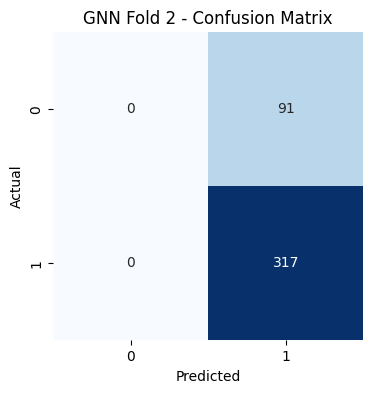

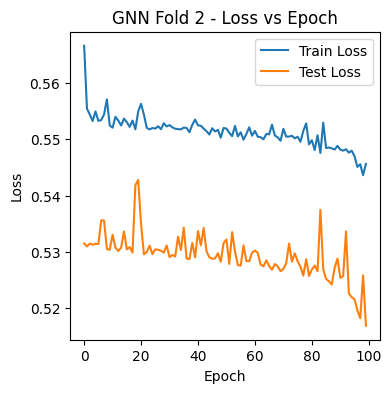

Fold 3
Epoch 0, Train Loss: 0.5656, Test Loss: 0.5584
Epoch 10, Train Loss: 0.5483, Test Loss: 0.5578
Epoch 20, Train Loss: 0.5452, Test Loss: 0.5568
Epoch 30, Train Loss: 0.5456, Test Loss: 0.5576
Epoch 40, Train Loss: 0.5439, Test Loss: 0.5568
Epoch 50, Train Loss: 0.5438, Test Loss: 0.5570
Epoch 60, Train Loss: 0.5431, Test Loss: 0.5567
Epoch 70, Train Loss: 0.5355, Test Loss: 0.5559
Epoch 80, Train Loss: 0.5219, Test Loss: 0.5518
Epoch 90, Train Loss: 0.4978, Test Loss: 0.5252


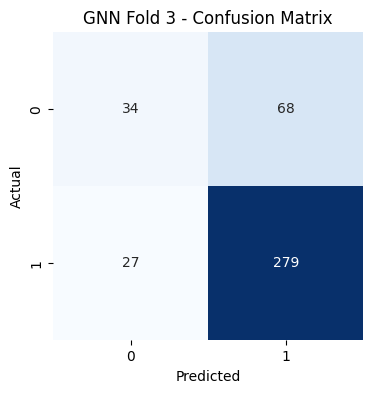

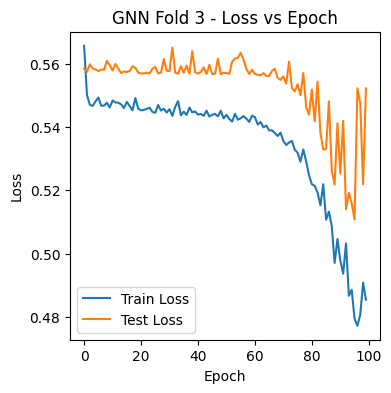

Fold 4
Epoch 0, Train Loss: 0.5593, Test Loss: 0.5615
Epoch 10, Train Loss: 0.5456, Test Loss: 0.5623
Epoch 20, Train Loss: 0.5441, Test Loss: 0.5618
Epoch 30, Train Loss: 0.5428, Test Loss: 0.5604
Epoch 40, Train Loss: 0.5438, Test Loss: 0.5691
Epoch 50, Train Loss: 0.5420, Test Loss: 0.5599
Epoch 60, Train Loss: 0.5413, Test Loss: 0.5606
Epoch 70, Train Loss: 0.5398, Test Loss: 0.5596
Epoch 80, Train Loss: 0.5376, Test Loss: 0.5552
Epoch 90, Train Loss: 0.5316, Test Loss: 0.5450


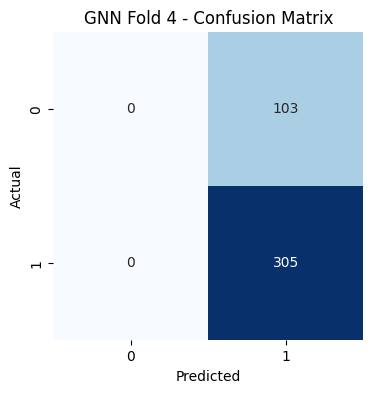

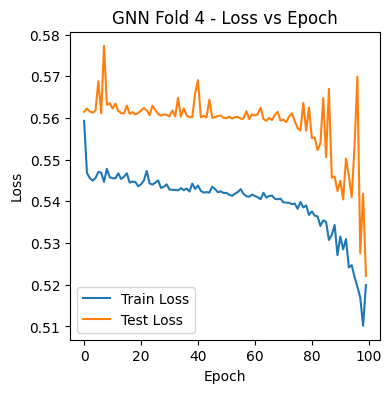

Fold 5
Epoch 0, Train Loss: 0.5684, Test Loss: 0.5119
Epoch 10, Train Loss: 0.5562, Test Loss: 0.5159
Epoch 20, Train Loss: 0.5565, Test Loss: 0.5118
Epoch 30, Train Loss: 0.5579, Test Loss: 0.5145
Epoch 40, Train Loss: 0.5551, Test Loss: 0.5186
Epoch 50, Train Loss: 0.5560, Test Loss: 0.5170
Epoch 60, Train Loss: 0.5574, Test Loss: 0.5128
Epoch 70, Train Loss: 0.5546, Test Loss: 0.5099
Epoch 80, Train Loss: 0.5547, Test Loss: 0.5069
Epoch 90, Train Loss: 0.5547, Test Loss: 0.5092


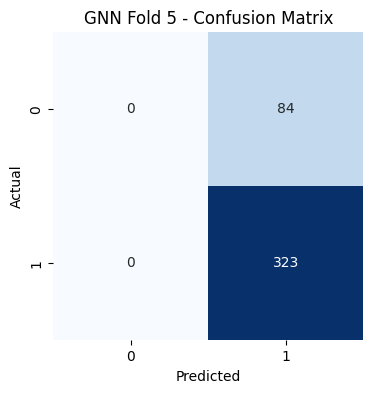

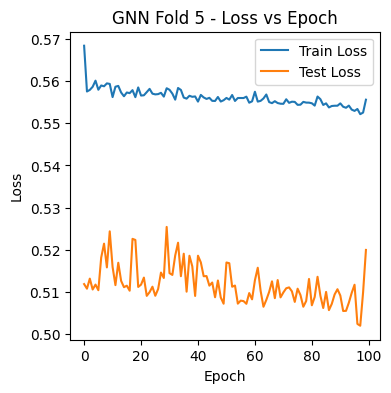

Average Accuracy: 0.769, Average AUC: 0.694


In [ ]:
# Define hyperparameters here
hidden_channels = 128
learning_rate = 0.001
num_epochs = 100
batch_size = 32

# Lists to store evaluation metrics
accuracy_scores = []
auc_scores = []

# K-Fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(graph_data_list)):
    print(f"Fold {fold + 1}")

    # Create train and test loaders
    train_dataset = [graph_data_list[i] for i in train_idx]
    test_dataset = [graph_data_list[i] for i in test_idx]
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize the model, optimizer, and loss function
    model = GNN(hidden_channels=hidden_channels)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.BCELoss()

    # Training loop
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        test_loss, _, _, _, _ = evaluate(model, test_loader, criterion)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

     # Evaluate the model
    _, accuracy, auc, y_true, y_pred_binary = evaluate(model, test_loader, criterion)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_binary)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'GNN Fold {fold + 1} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot loss vs epoch
    plt.figure(figsize=(4, 4))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(f'GNN Fold {fold + 1} - Loss vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Print overall performance
print(f'Average Accuracy: {np.mean(accuracy_scores):.3f}, Average AUC: {np.mean(auc_scores):.3f}')